<a href="https://colab.research.google.com/github/AmrHassanKhalaf/Summer_Training_NLP/blob/main/Sec_8/Task_2/preprocessing_Sec_9_T_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text Clustering on Transfer Learning on Stack Exchange Tags

## Transfer Learning on Stack Exchange Tags(preprocessing)

In [ ]:
!kaggle competitions download -c transfer-learning-on-stack-exchange-tags

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c transfer-learning-on-stack-exchange-tags

  0% 0.00/48.5M [00:00<?, ?B/s]
100% 48.5M/48.5M [00:00<00:00, 1.07GB/s]


In [ ]:
!unzip /content/transfer-learning-on-stack-exchange-tags.zip -d /content/data

Archive:  /content/transfer-learning-on-stack-exchange-tags.zip
  inflating: /content/data/biology.csv.zip  
  inflating: /content/data/cooking.csv.zip  
  inflating: /content/data/crypto.csv.zip  
  inflating: /content/data/diy.csv.zip  
  inflating: /content/data/robotics.csv.zip  
  inflating: /content/data/sample_submission.csv.zip  
  inflating: /content/data/test.csv.zip  
  inflating: /content/data/travel.csv.zip  


In [ ]:
!for file in /content/data/*.zip; do unzip -o "$file" -d /content/data; done

Archive:  /content/data/biology.csv.zip
  inflating: /content/data/biology.csv  
Archive:  /content/data/cooking.csv.zip
  inflating: /content/data/cooking.csv  
Archive:  /content/data/crypto.csv.zip
  inflating: /content/data/crypto.csv  
Archive:  /content/data/diy.csv.zip
  inflating: /content/data/diy.csv   
Archive:  /content/data/robotics.csv.zip
  inflating: /content/data/robotics.csv  
Archive:  /content/data/sample_submission.csv.zip
  inflating: /content/data/sample_submission.csv  
Archive:  /content/data/test.csv.zip
  inflating: /content/data/test.csv  
Archive:  /content/data/travel.csv.zip
  inflating: /content/data/travel.csv  


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import glob

In [ ]:
nltk.download("stopwords", quiet=True)
nltk.download("wordnet", quiet=True)
nltk.download("omw-1.4", quiet=True)
nltk.download('punkt_tab', quiet=True)
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'\<[^<>]*\>', '', text)
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r'^\W+|\W+$', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [ ]:
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [ ]:
df=pd.read_csv("/content/data/sample_submission.csv")
df

,id,tags
0,1,physics poetry
1,2,physics poetry
2,3,physics poetry
3,7,physics poetry
4,9,physics poetry
...,...,...
81921,278119,physics poetry
81922,278120,physics poetry
81923,278121,physics poetry
81924,278124,physics poetry


In [ ]:
files = [
    "/content/data/biology.csv",
    "/content/data/cooking.csv",
    "/content/data/crypto.csv",
    "/content/data/diy.csv",
    "/content/data/robotics.csv",
    "/content/data/travel.csv"
]

In [ ]:
dfs = []
for f in files:
    df = pd.read_csv(f)
    dfs.append(df)

In [ ]:
data = pd.concat(dfs, ignore_index=True)

In [ ]:
data["title_clean"] = data["title"].apply(clean_text)
data["content_clean"] = data["content"].apply(clean_text)

In [ ]:
data.to_csv("/content/data/clean.csv", index=False)

In [ ]:
data.head()

,id,title,content,tags,title_clean,content_clean
0,1,What is the criticality of the ribosome bindin...,"<p>In prokaryotic translation, how critical fo...",ribosome binding-sites translation synthetic-b...,criticality ribosome binding site relative sta...,p prokaryotic translation critical efficient t...
1,2,How is RNAse contamination in RNA based experi...,<p>Does anyone have any suggestions to prevent...,rna biochemistry,rnase contamination rna based experiment preve...,p anyone suggestion prevent rnase contaminatio...
2,3,Are lymphocyte sizes clustered in two groups?,<p>Tortora writes in <em>Principles of Anatomy...,immunology cell-biology hematology,lymphocyte size clustered two group,p tortora writes em principle anatomy physiolo...
3,4,How long does antibiotic-dosed LB maintain goo...,<p>Various people in our lab will prepare a li...,cell-culture,long antibiotic dosed lb maintain good selection,p various people lab prepare liter lb add kana...
4,5,Is exon order always preserved in splicing?,<p>Are there any cases in which the splicing m...,splicing mrna spliceosome introns exons,exon order always preserved splicing,p case splicing machinery construct mrna exon ...


In [ ]:
data.drop(["title", "content","id"], axis=1, inplace=True)

In [ ]:
data

,tags,title_clean,content_clean
0,ribosome binding-sites translation synthetic-b...,criticality ribosome binding site relative sta...,prokaryotic translation critical efficient tra...
1,rna biochemistry,rnase contamination rna based experiment preve...,anyone suggestion prevent rnase contamination ...
2,immunology cell-biology hematology,lymphocyte size clustered two group,tortora writes principle anatomy physiology ly...
3,cell-culture,long antibiotic dosed lb maintain good selection,various people lab prepare liter lb add kanamy...
4,splicing mrna spliceosome introns exons,exon order always preserved splicing,case splicing machinery construct mrna exon 5 ...
...,...,...,...
86995,usa food-and-drink california tipping san-fran...,tipping usa california sf,waiter time know one deserve tipping however s...
86996,uk canada france culture gifts,canadian appropriate gift bring travelling europe,live vancouver canada travelling london paris ...
86997,customs-and-immigration officials registration...,macedonian police issue visitor registration card,serbia macedonia register police staying count...
86998,visas austria,austrian visa renewed,austria visa multiple entry expires next month...


In [ ]:
data["text"] = data["title_clean"].fillna("") + " " + data["content_clean"].fillna("")

In [ ]:
X = data["text"]
y = data["tags"]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_df=.6,min_df=.05,ngram_range=(1,3))

In [ ]:
x=tfidf.fit_transform(X)
x.shape

(87000, 95)

In [ ]:
#truncatedsvd
from sklearn.decomposition import TruncatedSVD
tsvd=TruncatedSVD(n_components=90)
x_tsvd=tsvd.fit_transform(x)
tsvd.explained_variance_ratio_.sum()

np.float64(0.9728079812226823)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

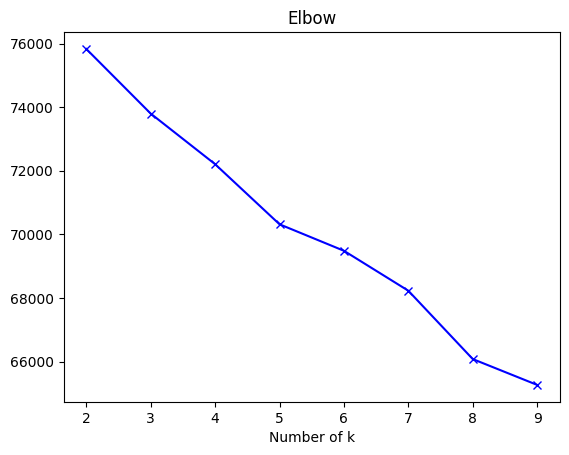

In [ ]:
inertias = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)
    kmeans.fit(x_tsvd)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel("Number of k")
plt.title("Elbow")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1, random_state=42)
clusters = kmeans.fit_predict(x_tsvd)

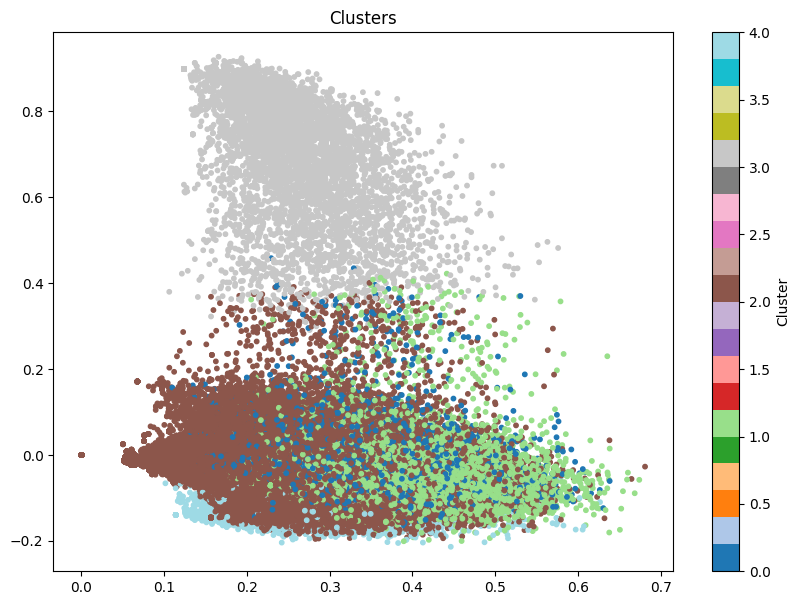

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(x_tsvd[:, 0], x_tsvd[:, 1], c=clusters, cmap="tab20", s=10)
plt.title("Clusters")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_df = pd.DataFrame({"text": X_train, "tags": y_train})
test_df  = pd.DataFrame({"text": X_test, "tags": y_test})
train_df.to_csv("/content/train.csv", index=False)
test_df.to_csv("/content/test.csv", index=False)
print("Train size:", len(train_df), " Test size:", len(test_df))